<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/vanilla-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [39]:
def VanillaLogisticRegression(x, y): # LR without regularization
    m, n = x.shape
    w = np.zeros((n+1, 1))
    X = np.hstack((np.ones(m)[:,None],x)) # include the feature corresponding to the bias term
    num_epochs = 100000 # number of epochs to run gradient descent, tune this hyperparametrer
    lr = 0.0005 # learning rate, tune this hyperparameter
    losses = []
    for i in range(num_epochs):
        y_hat = 1. / (1. + np.exp(-np.dot(X, w))) # predicted y by the LR model
        J = np.mean(-y*np.log2(y_hat) - (1-y)*np.log2(1-y_hat)) # the binary cross entropy loss function
        grad_J = np.mean((y_hat - y)*X, axis=0) # the gradient of the loss function
        w -= lr * grad_J[:, None] # the gradient descent step, update the parameter vector w
        losses.append(J)
        if i % 10000 == 0:
            print(J)
        # test corretness of the implementation
        # loss J should monotonically decrease & y_hat should be closer to y, with increasing iterations
        # print(J)
    return w



In [40]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data=pd.read_csv(url)
data.head(5)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [41]:
x = data[['student', 'balance','income']].values
y = data['default'].values.reshape(-1,1)

In [43]:
x.shape,y.shape

((10000, 3), (10000, 1))

In [44]:
w = VanillaLogisticRegression(x, y)

1.0


<ipython-input-39-dc4616e254a2>:9: RuntimeWarning: overflow encountered in exp
  y_hat = 1. / (1. + np.exp(-np.dot(X, w))) # predicted y by the LR model
<ipython-input-39-dc4616e254a2>:10: RuntimeWarning: divide by zero encountered in log2
  J = np.mean(-y*np.log2(y_hat) - (1-y)*np.log2(1-y_hat)) # the binary cross entropy loss function
<ipython-input-39-dc4616e254a2>:10: RuntimeWarning: invalid value encountered in multiply
  J = np.mean(-y*np.log2(y_hat) - (1-y)*np.log2(1-y_hat)) # the binary cross entropy loss function


nan
nan
nan
nan
nan
nan
nan
nan
nan


In [31]:
w

array([[-6.74641948],
       [-8.71016175],
       [44.28589306],
       [-5.8570164 ]])

In [15]:
m, n = 1000, 5 # 1000 rows, 5 columns
# randomly generate dataset, note that y can have values as 0 and 1 only
x1, y1 = np.random.random(m*n).reshape(m,n), np.random.randint(0,2,m).reshape(-1,1)
#w = VanillaLogisticRegression(x, y)
w # learnt parameters
x1.shape,y1.shape

((1000, 5), (1000, 1))

In [10]:
x.shape

(10000, 3)

In [8]:
w = VanillaLogisticRegression(x, y)
w # learnt parameters

ValueError: operands could not be broadcast together with shapes (10000,10000) (10000,4) 

In [3]:
len(data.index)

10000

In [ ]:
x.shape

(1000, 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, C=10**12).fit(x, y)
print(clf.coef_, clf.intercept_)

[[-0.05004358  0.08726424  0.19709375 -0.53630473  0.25901332]] [0.01326282]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x.shape

(1000, 5)

In [ ]:
w.shape

(6, 1)

In [ ]:
X = np.hstack((np.ones(m)[:,None],x))

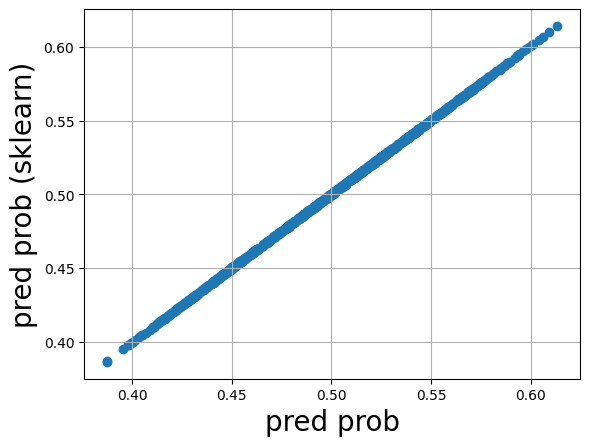

In [ ]:
import matplotlib.pyplot as plt
pred_probs = 1 / (1 + np.exp(-X@w))
plt.scatter(pred_probs, clf.predict_proba(x)[:,1])
plt.grid()
plt.xlabel('pred prob', size=20)
plt.ylabel('pred prob (sklearn)', size=20)
plt.show()

In [ ]:
print(sum((pred_probs > 0.5) == y) / len(y))
# [0.527]
clf.score(x, y)